## Visualizando las Mejores 10,000 Películas de IMDB


Este conjunto de datos se ha extraído de Kaggle, una plataforma conocida por su comunidad de entusiastas del análisis de datos y el aprendizaje automático.

Aquí, te presentamos una breve descripción del conjunto de datos proporcionada por su creador:

Adéntrate en las complejidades del séptimo arte con este conjunto de datos, que presenta una lista exhaustiva de las películas mejor valoradas en IMDB. Desde las calificaciones y votos hasta los resultados financieros de las películas, este conjunto de datos abarca una amplia gama de factores. Ofrece una visión profunda de las métricas que definen el éxito de una película y su lugar en la historia del cine.

**A**

**Exploración de Datos**

In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('movies.csv')
df.head(5)

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,NaN,12470,NaN
3,The Chaos Class,1975,87,NaN,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,NaN,42018,NaN
4,Daman,2022,121,NaN,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",9.1,NaN,13372,NaN


In [16]:

# Define una función para analizar valores faltantes
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Llama a la función y almacena el resultado en una variable
missing_info = missing_data(df)

# Muestra la información sobre valores faltantes
print(missing_info)


             Total    Percent
gross         2834  28.774495
metascore     1973  20.032491
certificate    356   3.614580
title            0   0.000000
year             0   0.000000
runtime          0   0.000000
genre            0   0.000000
director         0   0.000000
stars            0   0.000000
rating           0   0.000000
votes            0   0.000000


**B**  

**Limpieza y Transformación de Datos**

In [19]:
# Filtra el DataFrame para eliminar los años especificados
years_to_remove = ['1915', '1916', '1917', '1918', '1919', "'2022", '2023']
df = df[~df['year'].isin(years_to_remove)]

# 1. Elimina caracteres no numéricos de una cadena en la columna 'year'
def remove_non_numeric_characters(string):
    return re.sub('[^0-9]', '', string)

# Aplica la función 'remove_non_numeric_characters' a la columna 'year'
df['year'] = df['year'].apply(remove_non_numeric_characters)

# 2. Calcula la mediana de los ingresos ('gross') para cada 'año' único
median_revenue_by_year = df.groupby('year')['gross'].median()

# 3. Itera a través del DataFrame para llenar los valores faltantes de ingresos 'gross'
for index, row in df.iterrows():
    if pd.isnull(row['gross']):
        df.at[index, 'gross'] = median_revenue_by_year.get(row['year'], None)

# Muestra las primeras filas del DataFrame modificado
df.head()



,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,NaN,12470,24.76
3,The Chaos Class,1975,87,NaN,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,NaN,42018,12.48
4,Daman,2022,121,NaN,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",9.1,NaN,13372,93.88


**C**

**EDA y Visualización de Datos**

**Evolución Anual del Número de Películas Lanzadas (1915-2022)**

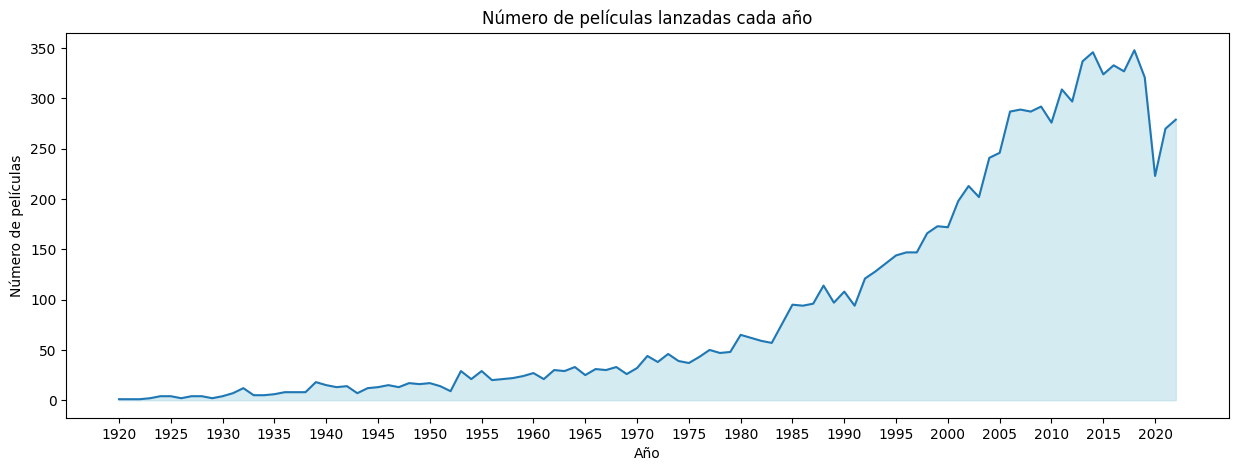

In [20]:

# Crear una figura y ejes para el gráfico
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Calcular el número de películas lanzadas por año y resetear el índice
movies_released = df.groupby('year').size().reset_index(name='count')

# Crear un gráfico de línea con Seaborn
sns.lineplot(data=movies_released, x='year', y='count', ax=axes)

# Rellenar el área debajo de la línea con un color
axes.fill_between(movies_released['year'], movies_released['count'], color='lightblue', alpha=0.5)

# Establecer marcas en el eje x para cada 5 años
plt.xticks(np.arange(1920 - 1920, 2022 - 1920, 5))

# Establecer título y etiquetas de los ejes
plt.title('Número de películas lanzadas cada año')
plt.ylabel('Número de películas')
plt.xlabel('Año')

# Mostrar el gráfico
plt.show()


Se puede observar un crecimiento sostenido a lo largo del tiempo, siendo más pronunciado a partir de la década de los 90. 

Sin embargo, la pandemia provocó un descenso significativo, aunque se ha recuperado rápidamente a partir de 2022.






**Ingresos Brutos Totales por Año**

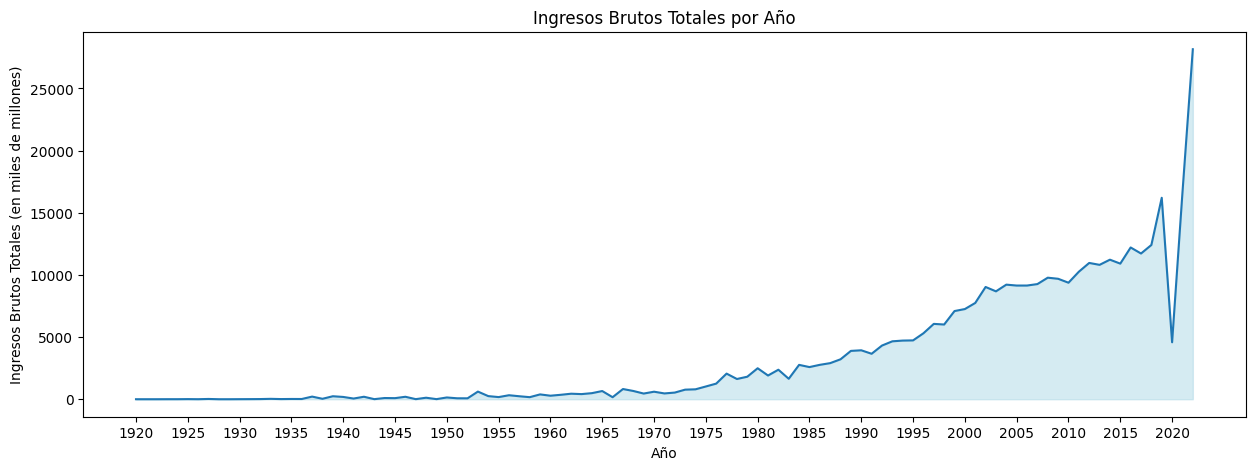

In [21]:


# Crear una figura y ejes para el gráfico
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Calcular el total de ingresos brutos por año y resetear el índice
total_gross_by_year = df.groupby('year')['gross'].sum().reset_index(name='total_gross')

# Crear un gráfico de línea con Seaborn
sns.lineplot(data=total_gross_by_year, x='year', y='total_gross', ax=axes)

# Rellenar el área debajo de la línea con un color
axes.fill_between(total_gross_by_year['year'], total_gross_by_year['total_gross'], color='lightblue', alpha=0.5)

# Establecer marcas en el eje x para cada 5 años
plt.xticks(np.arange(1920 - 1920, 2023 - 1920, 5))

# Establecer título y etiquetas de los ejes
plt.title('Ingresos Brutos Totales por Año')
plt.ylabel('Ingresos Brutos Totales (en miles de millones)')
plt.xlabel('Año')

# Mostrar el gráfico
plt.show()


Es similar al gráfico de lanzamientos de películas, pero los ingresos brutos experimentaron un descenso mucho más pronunciado debido a la pandemia. 

Asimismo, la recuperación también se ha destacado significativamente al finalizar la pandemia.






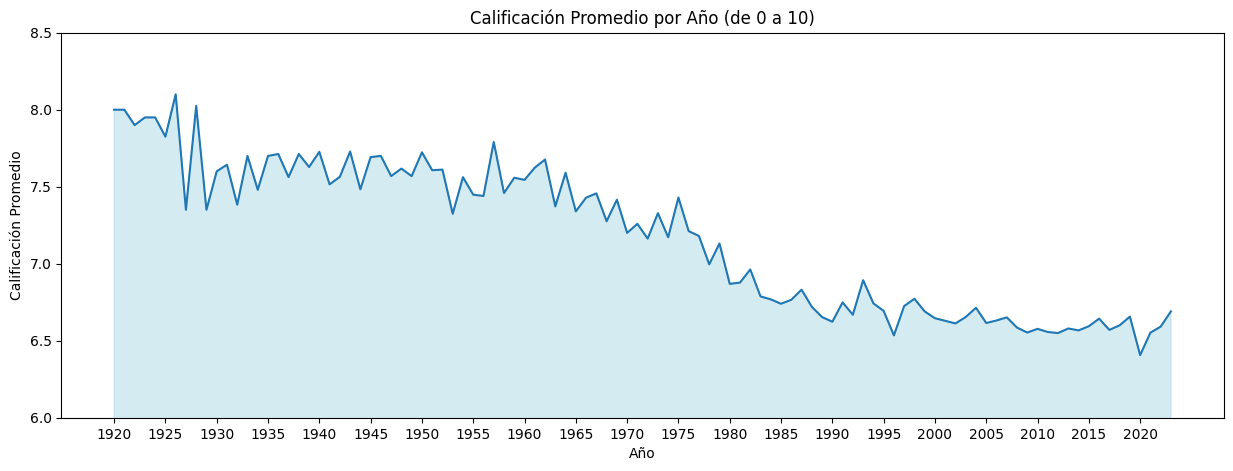

In [6]:

# Calcular la calificación promedio por año y resetear el índice
ave_rating_by_year = df.groupby('year')['rating'].mean().reset_index(name='mean')

# Crear una figura y ejes para el gráfico
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Crear un gráfico de línea con Seaborn
sns.lineplot(data=ave_rating_by_year, x='year', y='mean', ax=axes)

# Rellenar el área debajo de la línea con un color
axes.fill_between(ave_rating_by_year['year'], ave_rating_by_year['mean'], color='lightblue', alpha=0.5)

# Establecer los límites del eje y
axes.set_ylim(6, 8.5)

# Establecer marcas en el eje x para cada 5 años
plt.xticks(np.arange(1920 - 1920, 2023 - 1920, 5))


# Establecer título y etiquetas de los ejes
plt.title('Calificación Promedio por Año (de 0 a 10)')
plt.ylabel('Calificación Promedio')
plt.xlabel('Año')

# Mostrar el gráfico
plt.show()



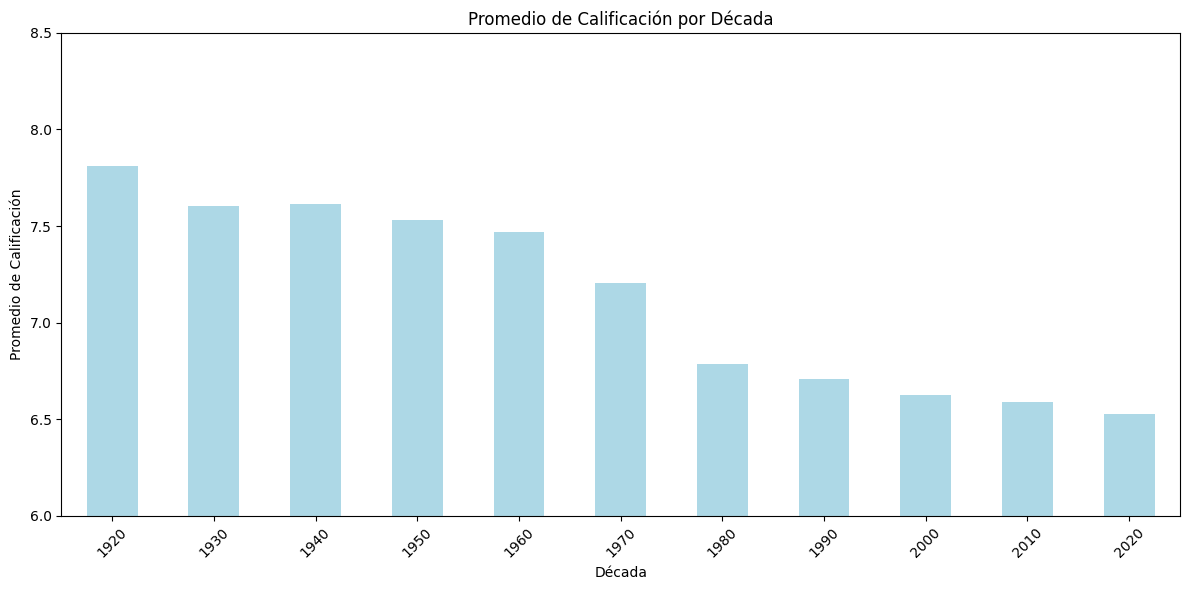

In [7]:
# Asegurarse de que la columna 'year' esté en formato numérico
df['year'] = df['year'].astype(int)

# Crear una columna para representar la década
df['decade'] = (df['year'] // 10) * 10

# Calcular el promedio de calificación por década
average_rating_by_decade = df.groupby('decade')['rating'].mean()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
average_rating_by_decade.plot(kind='bar', color='lightblue')

# Establecer título y etiquetas de ejes
plt.title('Promedio de Calificación por Década')
plt.xlabel('Década')
plt.ylabel('Promedio de Calificación')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad

# Establecer los límites del eje y
plt.ylim(6, 8.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


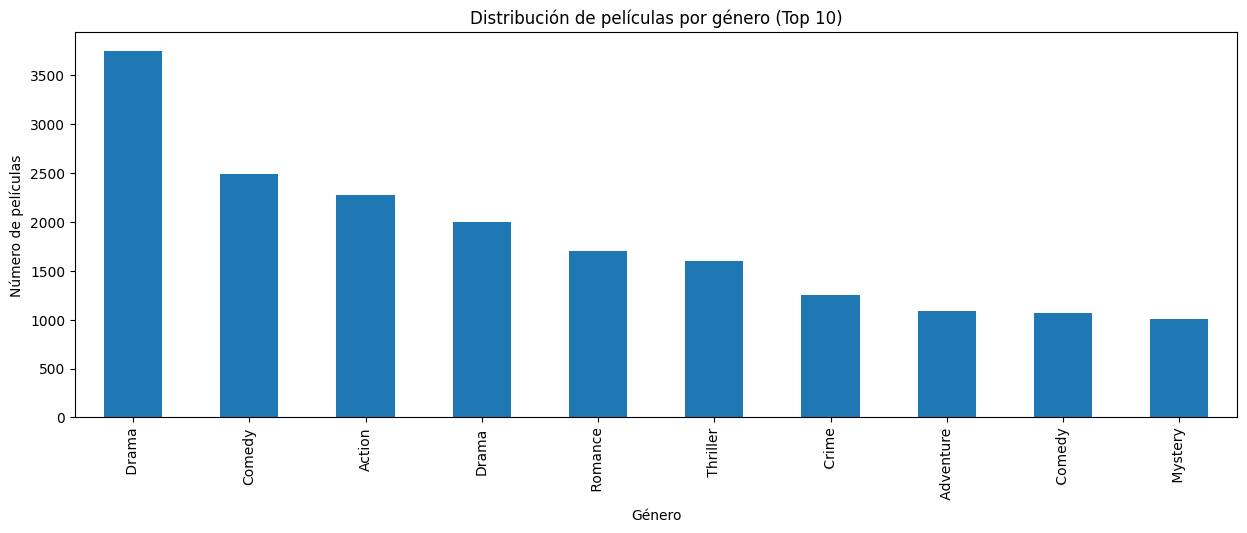

In [23]:
# Gráfico de barras para visualizar la distribución de las películas por género
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Obtener los 10 primeros géneros más comunes
top_10_generos = df['genre'].str.split(',').explode().value_counts().head(10)
top_10_generos.plot(kind='bar', ax=axes)

plt.title('Distribución de películas por género (Top 10)')
plt.xlabel('Género')
plt.ylabel('Número de películas')

# Mostrar el gráfico
plt.show()

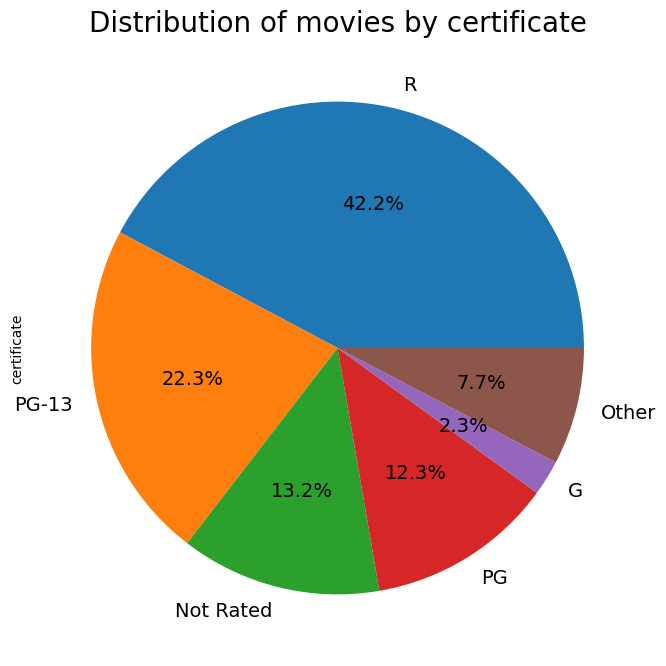

In [24]:
# Pie chart to visualize the distribution of movies by certificate
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.set_facecolor('#FFFFFF')

certificate_counts = df['certificate'].value_counts()

# Label others for better visualization
threshold = 200 # 5%
main_genres = certificate_counts[certificate_counts >= threshold].index
other_genres = certificate_counts[certificate_counts < threshold]
genre_counts_combined = certificate_counts.copy()
genre_counts_combined = genre_counts_combined[main_genres]
genre_counts_combined['Other'] = other_genres.sum()
genre_counts_combined.plot(kind='pie', y='count',  ax=axes, autopct='%1.1f%%', shadow=False, legend = False, fontsize=14)

plt.title('Distribution of movies by certificate', fontsize=20)
plt.show()

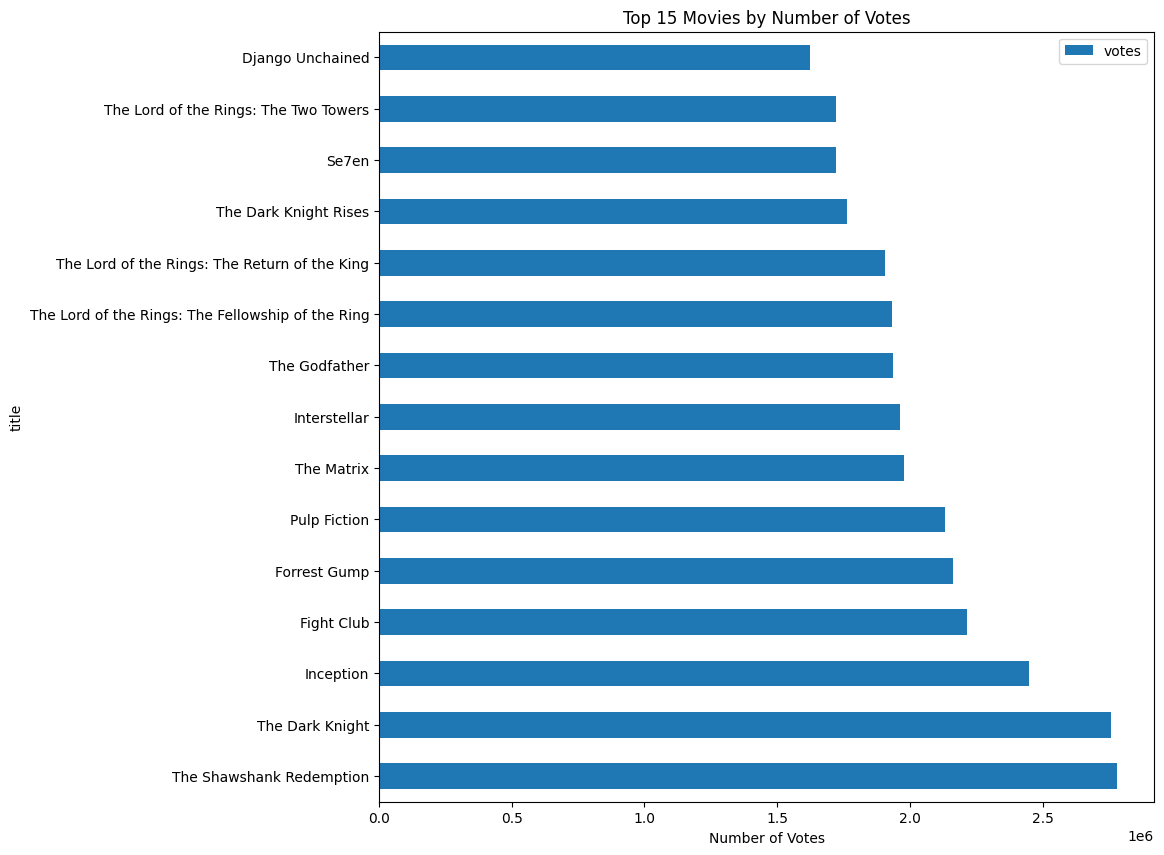

In [10]:
# Order by number of votes
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
votes = df.sort_values('votes', ascending=False)
votes[:15].plot(kind='barh', x='title', y='votes', ax=axes)
plt.xlabel('Number of Votes')
plt.title('Top 15 Movies by Number of Votes')
plt.show()

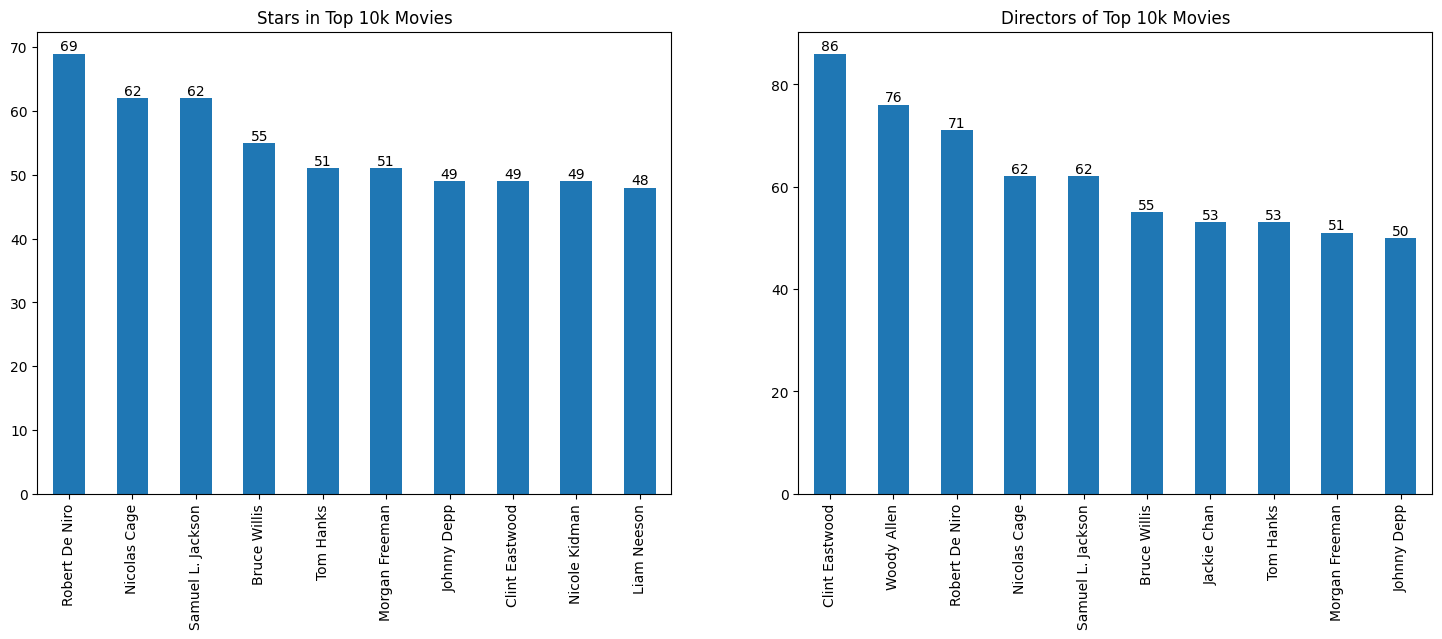

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Stars that appear in the most movies in top 10k movies
import ast
# Convert the string representation of lists to actual lists
stars_col = df['stars'].apply(ast.literal_eval)
all_stars = [star for stars in stars_col for star in stars]
star_counts = pd.Series(all_stars).value_counts()
star_counts[:10].plot(kind='bar', ax=axes[0], title='Stars in Top 10k Movies')

# Directors that appear in the most movies in top 10k movies
directors_col = df['director'].apply(ast.literal_eval)
all_directors = [director for directors in directors_col for director in directors]
director_counts = pd.Series(all_directors).value_counts()
director_counts[:10].plot(kind='bar', ax=axes[1], title='Directors of Top 10k Movies')

axes[0].bar_label(axes[0].containers[0])
axes[1].bar_label(axes[1].containers[0])
plt.show()

del all_stars, star_counts, all_directors, director_counts

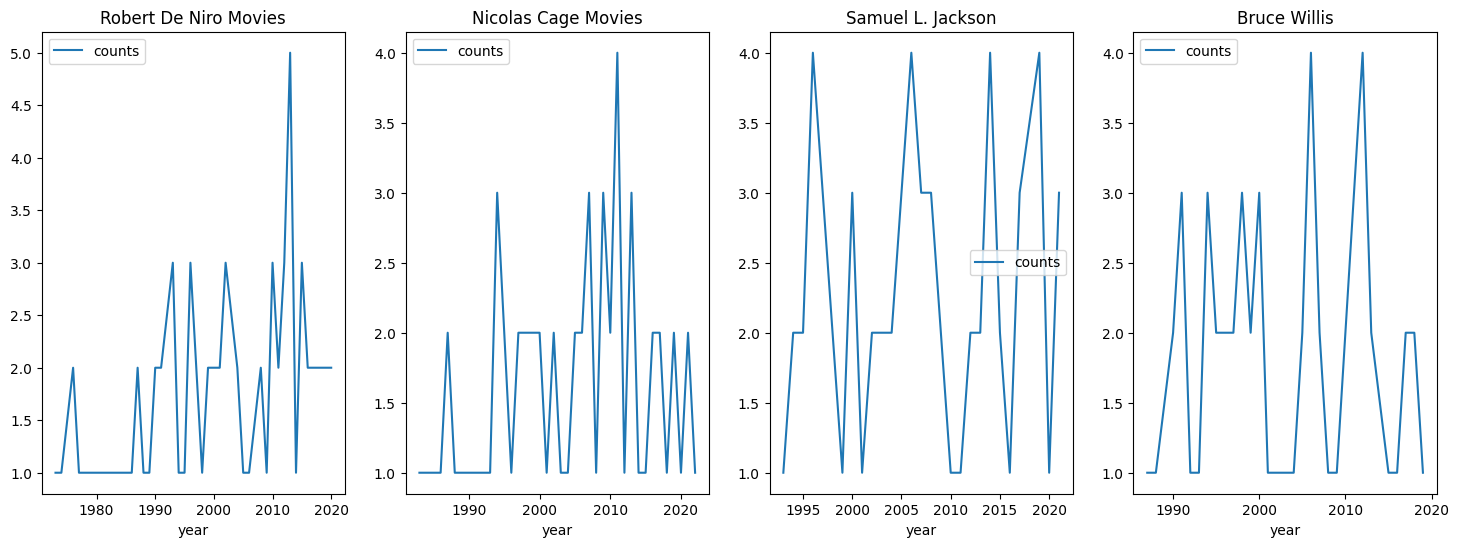

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

stars_occurances1 = df[df['stars'].str.contains('Robert De Niro')]
stars_occurances1_by_year = stars_occurances1.groupby('year').size().reset_index(name='counts')
stars_occurances1_by_year.plot(kind='line', x='year', y='counts', title='Robert De Niro Movies', ax=axes[0])

stars_occurances2 = df[df['stars'].str.contains('Nicolas Cage')]
stars_occurances2_by_year = stars_occurances2.groupby('year').size().reset_index(name='counts')
stars_occurances2_by_year.plot(kind='line', x='year', y='counts', title='Nicolas Cage Movies', ax=axes[1])

stars_occurances3 = df[df['stars'].str.contains('Samuel L. Jackson')]
stars_occurances3_by_year = stars_occurances3.groupby('year').size().reset_index(name='counts')
stars_occurances3_by_year.plot(kind='line', x='year', y='counts', title='Samuel L. Jackson', ax=axes[2])

stars_occurances4 = df[df['stars'].str.contains('Bruce Willis')]
stars_occurances4_by_year = stars_occurances4.groupby('year').size().reset_index(name='counts')
stars_occurances4_by_year.plot(kind='line', x='year', y='counts', title='Bruce Willis', ax=axes[3])

plt.show()

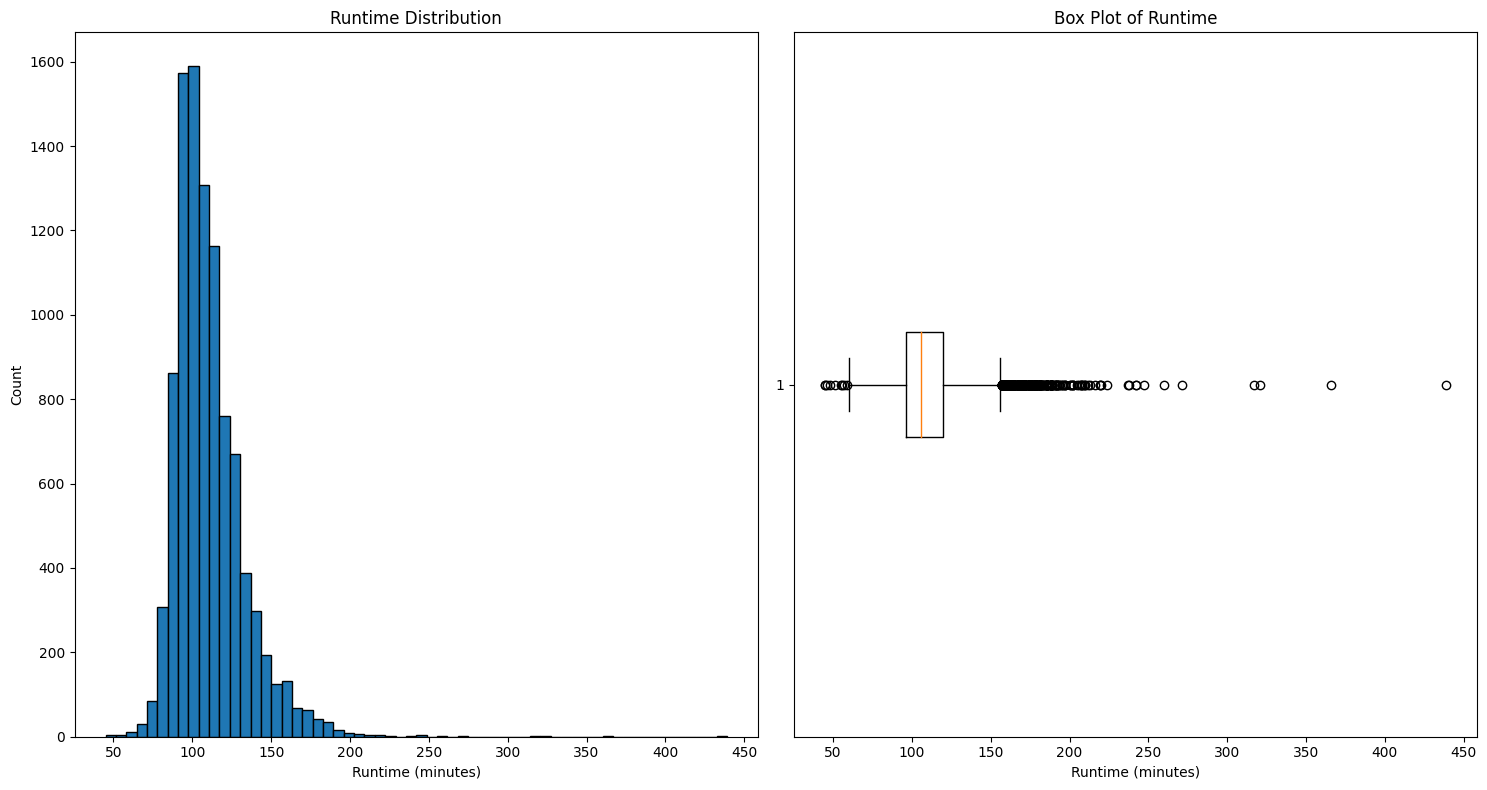

In [13]:
# Lastly, lets look at the distribution of top 10K movies by runtime
# runtime = df['runtime'].dropna()
# plt.hist(runtime, bins=50)
# plt.title('Runtime Distribution')
# plt.xlabel('Runtime (minutes)')
# plt.ylabel('Count')
# plt.show()

# # Use a boxplot to look at the distribution of runtime
# plt.boxplot(runtime)

# Create a new figure and a grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Histogram
ax1.hist(df['runtime'], bins=60, edgecolor='black')
ax1.set_title('Runtime Distribution')
ax1.set_xlabel('Runtime (minutes)')
ax1.set_ylabel('Count')

# Box plot
ax2.boxplot(df['runtime'], vert=False)
ax2.set_title('Box Plot of Runtime')
ax2.set_xlabel('Runtime (minutes)')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()